#### Fetching complete Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import platform
import sys

In [3]:
#  Setting Path to Dataset
def check_if_colab():
    if 'google.colab' in sys.modules:
        return True
    return False

In [4]:
if check_if_colab():
    print("Running on Google Colab")
    # from google.colab import drive
    # drive.mount('/content/drive')
    # BASE_PATH_TO_DATASETS='/content/drive/MyDrive/OMSCS/cs7641/All assignments/Assignments/Assignment-1'
    # BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_DATASETS,'pubg')
else:
  if platform.system().lower().__contains__('windows'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE =os.path.join(BASE_PATH_TO_DATASETS, 'code_base')

  elif platform.system().lower().__contains__('linux'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY, 'code_base')
  else:
      print('OS Error')
os.listdir(BASE_PATH_TO_DATASETS)

['DataSet.xlsx', 'modified_dataset.xlsx']

In [5]:
PATH_TO_DATATSET_XLSX=os.path.join(BASE_PATH_TO_DATASETS, 'DataSet.xlsx')
PATH_TO_DATATSET_XLSX

'/media/vchopra/DATA/Complete Technical Work/All  Projects Implemented/Small Projects/Artificial Intelligence Projects/Code Base/Natural_Language_Processing_Projects/Parsec_Assignment/dataset/DataSet.xlsx'

In [6]:
df=pd.read_excel(PATH_TO_DATATSET_XLSX)
df.tail()

,datasheet_link,target_col
2565,https://www.memoryprotectiondevices.com/datash...,others
2566,https://www.memoryprotectiondevices.com/datash...,others
2567,https://www.memoryprotectiondevices.com/datash...,others
2568,http://www.switchcomp.com/switchcomp_ecommerce...,others
2569,http://www.switchcomp.com/switchcomp_ecommerce...,others


#### Basic Distribution Plot

/home/vchopra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


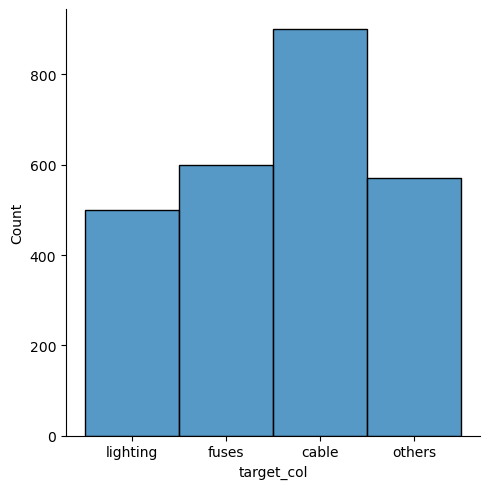

In [7]:
sns.displot(df['target_col'])

### Fixing a few URL's

In [8]:
import re
import requests
from urllib.parse import urlparse

In [9]:
def fix_digikey_url(url: str) -> str:
    """Add https:// prefix to digikey URLs if missing"""
    if url.startswith("//mm.digikey"):
        return f"https:{url}"
    return url

In [10]:
url = "mm.digikey.com/Volume0/opasdata/d220001/medias/docus/665/1704853.pdf"
fixed_url = fix_digikey_url(url)
fixed_url

'mm.digikey.com/Volume0/opasdata/d220001/medias/docus/665/1704853.pdf'

In [11]:
df['fixed_url'] = df['datasheet_link'].apply(fix_digikey_url)
df

,datasheet_link,target_col,fixed_url
0,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...
1,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...
2,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...
3,https://www.waclighting.com/storage/waclightin...,lighting,https://www.waclighting.com/storage/waclightin...
4,https://www.acuitybrands.com/api/products/geta...,lighting,https://www.acuitybrands.com/api/products/geta...
...,...,...,...
2565,https://www.memoryprotectiondevices.com/datash...,others,https://www.memoryprotectiondevices.com/datash...
2566,https://www.memoryprotectiondevices.com/datash...,others,https://www.memoryprotectiondevices.com/datash...
2567,https://www.memoryprotectiondevices.com/datash...,others,https://www.memoryprotectiondevices.com/datash...
2568,http://www.switchcomp.com/switchcomp_ecommerce...,others,http://www.switchcomp.com/switchcomp_ecommerce...


###   Creating Dataset

In [13]:
# ! pip install PyPDF2

In [14]:
import requests
import PyPDF2
import io

In [15]:
# for i in range(0,len(df)):
#     if df['fixed_url'].iloc[i]=='-':
#         print(i)
#     else:
#         continue

In [16]:
import time

In [26]:
def fetch_pdf_text(url):
    start_time=time.time()
    response = requests.get(url, timeout=20)
    total_time=time.time()-start_time
    status_code = response.status_code
    
    # Check HTTP status codes
    if status_code == 404:
        return f"Error 404: Not found => {url}"
    elif status_code != 200:
        return f"Error {status_code}: Failed to download => {url}"
    
    return response, status_code, total_time


def return_pdf_text(response):
    pdf_file = io.BytesIO(response.content)
    
    # Create PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    
    # Extract text from all pages
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    
    return text.strip()


def read_pdf_from_url(url):
    try:
        if url == '-':
            return "No URL provided", -1, 0 
        
        response, status_code, total_time = fetch_pdf_text(url)
        text = return_pdf_text(response)
        
        # If fetch_pdf_text returned an error string instead of a response object:
        if isinstance(response, str):
            return response, status_code, total_time
        
        text = return_pdf_text(response)
        # print(url + ":" +text[:100])
        # print(text[:100], status_code)
        return text, status_code, total_time
    
    except requests.exceptions.Timeout:
        return f"Timeout: Could not retrieve PDF from {url}", 0, 0
    except requests.RequestException as e:
        return f"Error downloading PDF: {str(e)}", -1, 0
    except Exception as e:
        return f"Error processing PDF: {str(e)}", -1, 0

In [30]:
# Select 5 samples from the dataframe
sample_df = df.sample(1)
sample_df[['fixed_url', 'target_col']]

,fixed_url,target_col
388,https://www.kelvix.com/product/vine/spec-sheet/,lighting


In [31]:
sample_results= read_pdf_from_url(sample_df['fixed_url'].iloc[0])
# sample_results=(sample_df['fixed_url'].apply(read_pdf_from_url))
print(sample_results, type(sample_results))

('Conforms to ANSI/UL Standard 2108\nCertified to CAN/CSA Standard C22.2 No. 250.0\nQuestions/Support   |   800-789-3810   |   quotes@kelvix.com 102324JDFixture Type:\nProject:\nLocation:\nPRODUCT FEATURES\n• 360º Continuous Light Source\n• Universal Dimming\n• 36,000 Hour Life\n• IP65 Rated for Outdoor Use\n• Factory-Installed Power Feed\n• Injection-Molded Flush End Caps\n• For Use with 24V Power SuppliesBEND RADIUS\nSPECIFICATIONS\nSeries VN—Vine™\nInput Voltage 24V DC\nMax Run Length Unlimited, Power Feed Every 16.4ft\nBeam Angle 360°\nDimensions 1" (25mm)\nProduction Intervals 0.47" (11.9mm)\nCRI 90+Min Bend Radius 4.72" (120mm)\nDimming OptionsWatts per Foot 4.39 W/FT\nTemp Range -22°F (-30°C) to 131°F (55°C)PWM, Triac, 0-10V, DMX, Hi-lumeORDERING INFORMATION\nExample:  VN-25-48-30K-E-72\nLength\nInches(Unlimited)Color\n24K - 2400K\n27K - 2700K30K - 3000K35K - 3500K40K - 4000KE - End FeedSF - Side FeedFeed Point Feed Length\n72 - 72 Inch (Standard)192 - 192 InchVN27K\n2700K\n268 

In [32]:
sample_df['pdf_text_sample'] , sample_df['link_status_code'], sample_df['link_time_taken'] = sample_results[0], sample_results[1], sample_results[2]
sample_df[['datasheet_link', 'pdf_text_sample', 'link_status_code', 'link_time_taken']]

,datasheet_link,pdf_text_sample,link_status_code,link_time_taken
388,https://www.kelvix.com/product/vine/spec-sheet/,Conforms to ANSI/UL Standard 2108\nCertified t...,200,6.712012


#### Completing for all PDF

In [ ]:
# from tqdm import tqdm
# tqdm.pandas()
# df['pdf_text'] = df['fixed_url'].progress_apply(read_pdf_from_url)
# df.head()

In [33]:
import multiprocessing
from tqdm import tqdm
tqdm.pandas()

def multiprocess_read(df, url_column='fixed_url'):
    """Use multiple processes + tqdm to apply read_pdf_from_url."""
    with multiprocessing.Pool() as pool:
        results = list(tqdm(pool.imap(read_pdf_from_url, df[url_column]), total=len(df)))
    
    # Unpack results (list of (text, status_code)) into separate columns
    pdf_text_sample, link_status_code, link_time_taken = zip(*results)
    df['pdf_text_sample'] = pdf_text_sample
    df['link_status_code'] = link_status_code
    df['link_time_taken'] = link_time_taken
    
    return df

In [34]:
dataset = multiprocess_read(df, 'fixed_url')
print(dataset[['datasheet_link','pdf_text_sample','link_status_code']])

  2%|▏         | 55/2570 [00:26<13:26,  3.12it/s] unknown widths : 
[0, IndirectObject(503, 0, 130432004637200)]
unknown widths : 
[0, IndirectObject(498, 0, 130432004637200)]
unknown widths : 
[0, IndirectObject(503, 0, 130432004637200)]
unknown widths : 
[0, IndirectObject(498, 0, 130432004637200)]
unknown widths : 
[0, IndirectObject(503, 0, 130431964797136)]
unknown widths : 
[0, IndirectObject(498, 0, 130431964797136)]
unknown widths : 
[0, IndirectObject(503, 0, 130431964797136)]
unknown widths : 
[0, IndirectObject(498, 0, 130431964797136)]
  2%|▏         | 56/2570 [00:28<17:32,  2.39it/s]unknown widths : 
[0, IndirectObject(845, 0, 130432020410064)]
unknown widths : 
[0, IndirectObject(840, 0, 130432020410064)]
unknown widths : 
[0, IndirectObject(543, 0, 130432020410064)]
unknown widths : 
[0, IndirectObject(538, 0, 130432020410064)]
unknown widths : 
[0, IndirectObject(845, 0, 130431966019536)]
unknown widths : 
[0, IndirectObject(840, 0, 130431966019536)]
unknown widths : 
[

                                         datasheet_link  \
0     https://lfillumination.com/files/specsheets/EF...   
1     https://lfillumination.com/files/specsheets/EF...   
2     https://lfillumination.com/files/specsheets/EF...   
3     https://www.waclighting.com/storage/waclightin...   
4     https://www.acuitybrands.com/api/products/geta...   
...                                                 ...   
2565  https://www.memoryprotectiondevices.com/datash...   
2566  https://www.memoryprotectiondevices.com/datash...   
2567  https://www.memoryprotectiondevices.com/datash...   
2568  http://www.switchcomp.com/switchcomp_ecommerce...   
2569  http://www.switchcomp.com/switchcomp_ecommerce...   

                                        pdf_text_sample  link_status_code  
0     EF400 System  # EF408B\nDIE CAST CYLINDRICAL L...               200  
1     Error processing PDF: too many values to unpac...                -1  
2     EF400 System  # EF407B\nDIE CAST CYLINDRICAL L...        

In [35]:
df.head()

,datasheet_link,target_col,fixed_url,pdf_text_sample,link_status_code,link_time_taken
0,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...,EF400 System # EF408B\nDIE CAST CYLINDRICAL L...,200,2.461363
1,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...,Error processing PDF: too many values to unpac...,-1,0.000000
2,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...,EF400 System # EF407B\nDIE CAST CYLINDRICAL L...,200,2.166040
3,https://www.waclighting.com/storage/waclightin...,lighting,https://www.waclighting.com/storage/waclightin...,ADJ UST ABLE BEAM WALL WASH 12V\n5221\nORDER...,200,0.786168
4,https://www.acuitybrands.com/api/products/geta...,lighting,https://www.acuitybrands.com/api/products/geta...,Type:\nProject:HDMC\nSurface Mount with FAR-UV...,200,7.811381


In [37]:
df.to_csv(os.path.join(BASE_PATH_TO_DATASETS, 'modified_dataset_v1.xlsx'), index=False)